## Processing cleaned data collected from the first 5 results pages of https://www.boat24.com/en/secondhandboats

    - data processing can be based on several aspects, we have highlighted only a few of them below
        - requeste the basic characteristics of the columns
        - visualize the distribution of numerical and categorical data separately
        - create a correlation matrix to examine the relationships between numerical variables
        - make a barplot of the relationship between one numerical and one categorical data

In [1]:
import pandas as pd
import numpy as np

from plotnine import *

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('boat24_five_page_ships_cleaned.csv')
print(df.shape)
df.head()

(95, 22)


,name,currency,amount,country,city,equipments,year_built,condition,material,propulsion,...,length_m,beam_m,draught_m,displacement_kg,persons,cabins,berths,engine,engine_performance,engine_hours
0,Azimut 46 Evolution 2007,EUR,390000.0,Croatia,Punat,"Shore Connection, Generator, Battery, Battery ...",2007,very good condition,grp,inboard direct-drive,...,14.60,4.41,1.20,NaN,12.0,2.0,4.0,caterpillar c9,2 x 510 hp / 375 kw,1100.0
1,Sunseeker Portofino 47,EUR,360000.0,Germany,Neustadt,"Shore Connection, Generator, Battery, Battery ...",2008,very good condition,grp,pod drive,...,14.96,4.29,1.20,16400.0,12.0,2.0,2.0,volvo penta d6-435 ips600,2 x 435 hp / 320 kw,995.0
2,Bénéteau Antares 7 OB V2,EUR,81150.0,Italy,Ancona,"Stove, Gas Stove, Sink, Fridge, Compass, GPS, ...",2023,NaN,grp,"outboard, four-stroke",...,7.48,2.53,0.80,1651.0,8.0,1.0,3.0,honda marine,1 x 150 hp / 110 kw,NaN
3,Jeanneau Merry Fisher 895 Offshore,EUR,169000.0,Germany,Kembs,"Shore Connection, Battery, Battery Charger, In...",2020,very good condition,grp,"outboard, four-stroke",...,9.07,2.99,0.64,4500.0,6.0,2.0,6.0,yamaha f200 getx,2 x 200 hp / 147 kw,45.0
4,Hallberg-Rassy 36MKII,Price,NaN,Italy,Sanremo,NaN,2001,very good condition,NaN,NaN,...,11.00,NaN,NaN,NaN,9.0,NaN,NaN,NaN,NaN,NaN


## Basic characteristics of columns

In [3]:
# examine the basic statistical characteristics of numerical data
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', '{:.0f}'.format)
df.describe()

,amount,year_built,fuel_quantity_l,length_m,beam_m,draught_m,displacement_kg,persons,cabins,berths,engine_hours
count,86,95,76,95,93,75,67,53,68,74,68
mean,251581,2003,948,12,4,1,12384,9,2,4,1171
std,433693,19,1312,5,1,1,16721,3,1,2,1224
min,3600,1915,20,4,2,0,71,2,1,1,30
25%,54600,1996,238,8,3,1,2169,7,2,3,318
50%,115000,2006,460,11,4,1,7500,9,2,4,835
75%,282500,2017,1050,14,4,2,14000,10,3,6,1538
max,3090000,2023,7000,29,6,3,90000,18,5,10,5100


In [4]:
# examine the basic characteristics of object data
df.describe(include=['object'])

,name,currency,country,city,equipments,condition,material,propulsion,fuel_type,engine,engine_performance
count,95,95,95,95,78,53,82,57,81,89,85
unique,94,3,18,73,78,5,5,7,4,76,65
top,Marex Maren 310 Sun Cruiser,EUR,Italy,verkoophaven,"Shore Connection, Generator, Battery, Battery ...",very good condition,grp,inboard direct-drive,diesel,volvo penta,1 x 300 hp / 221 kw
freq,2,86,28,9,1,29,64,25,56,6,4


## Histograms and boxplots of the distribution of numerical variables


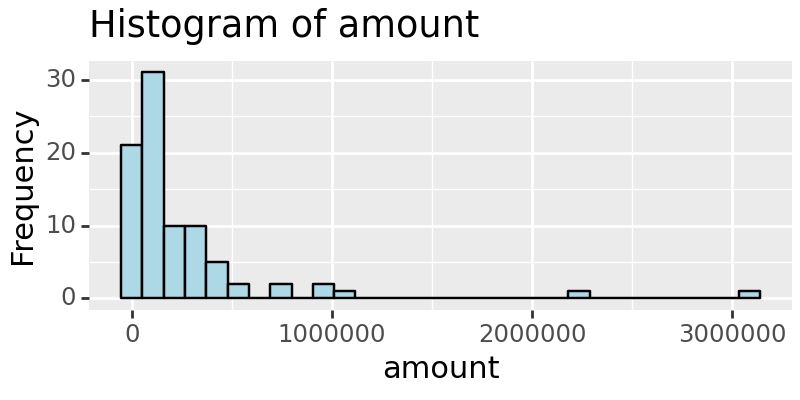

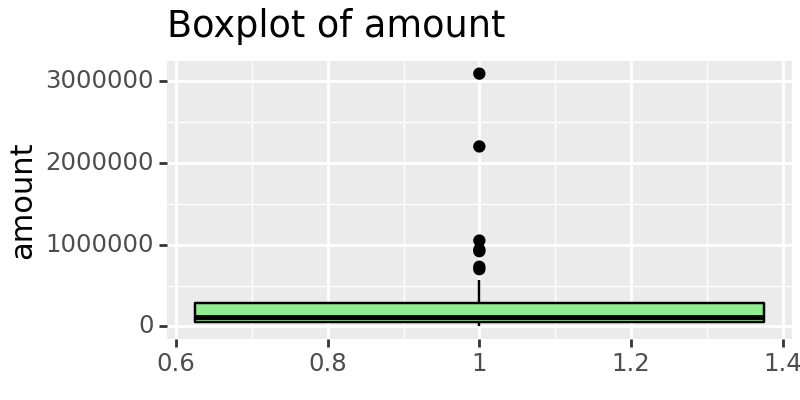

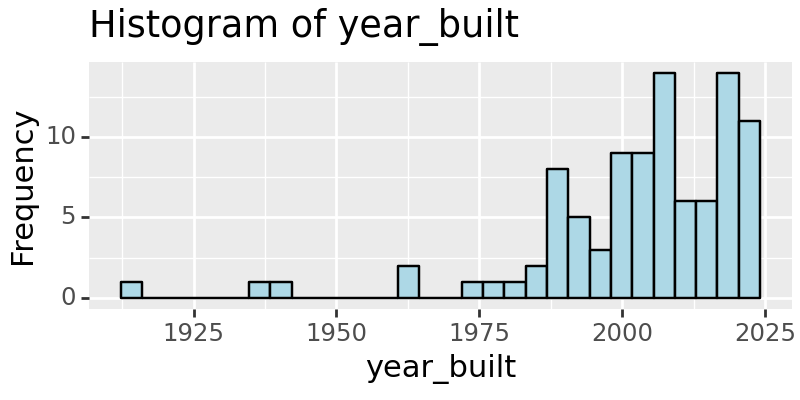

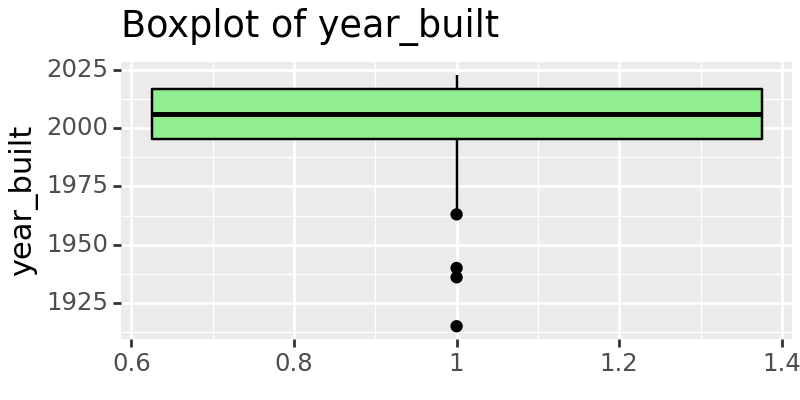

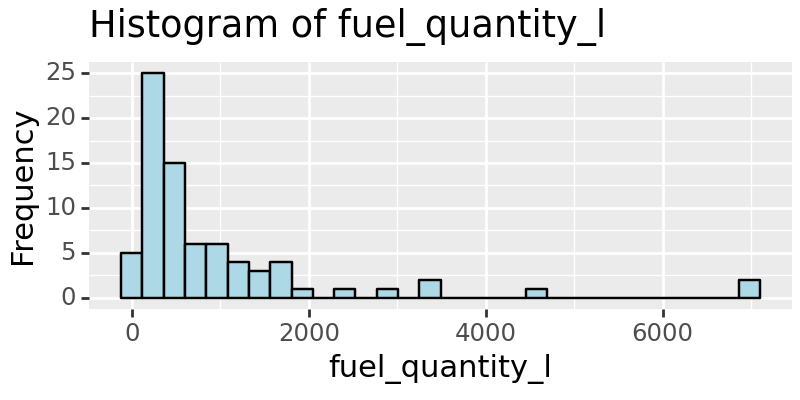

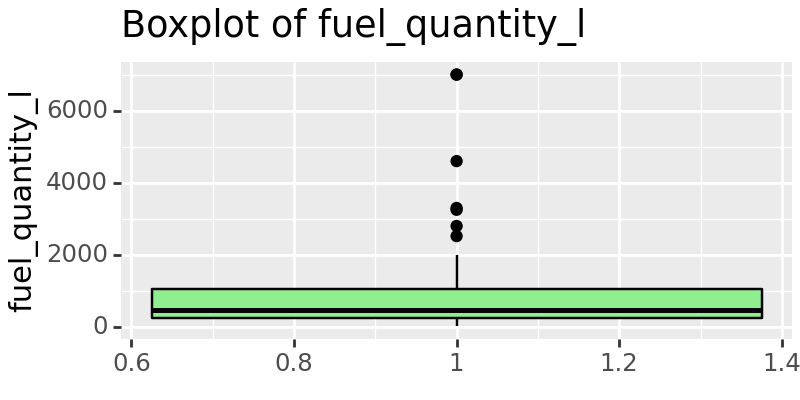

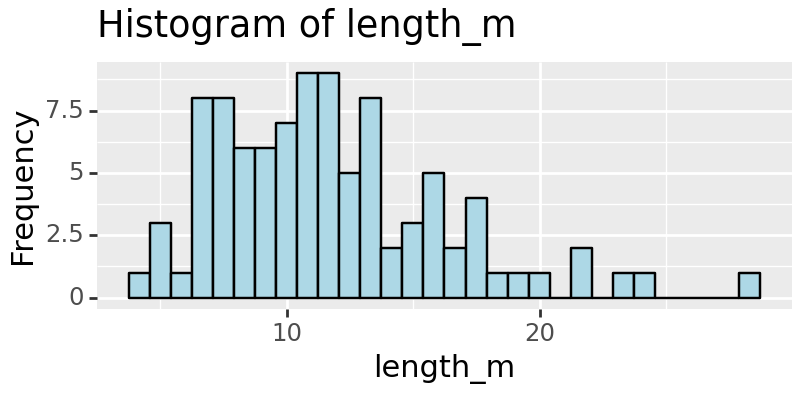

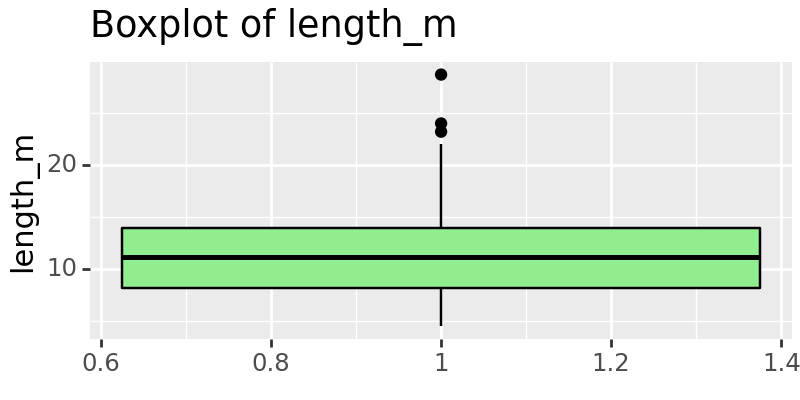

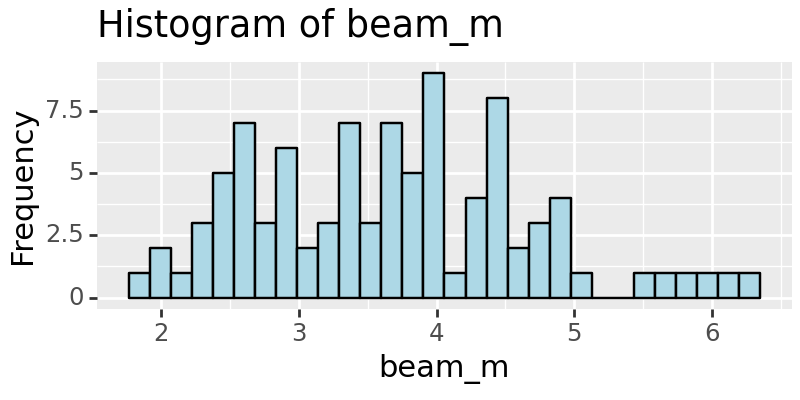

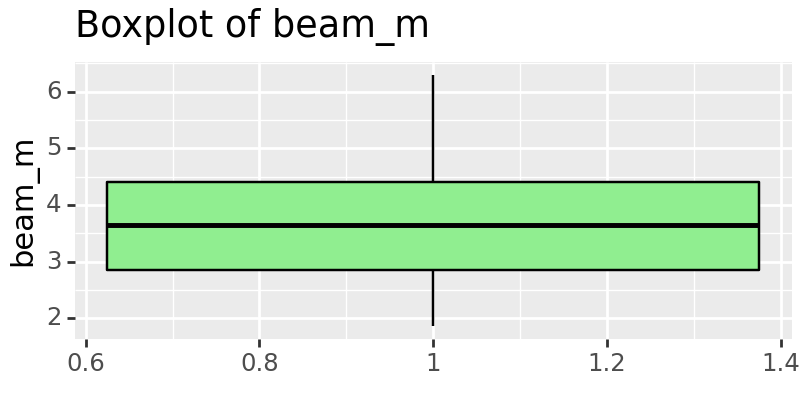

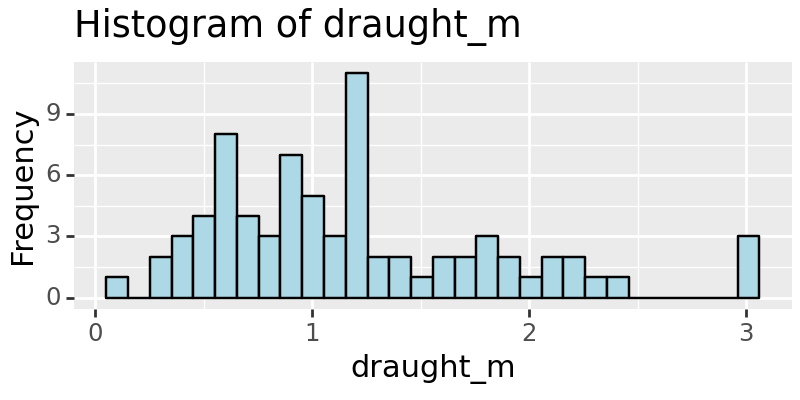

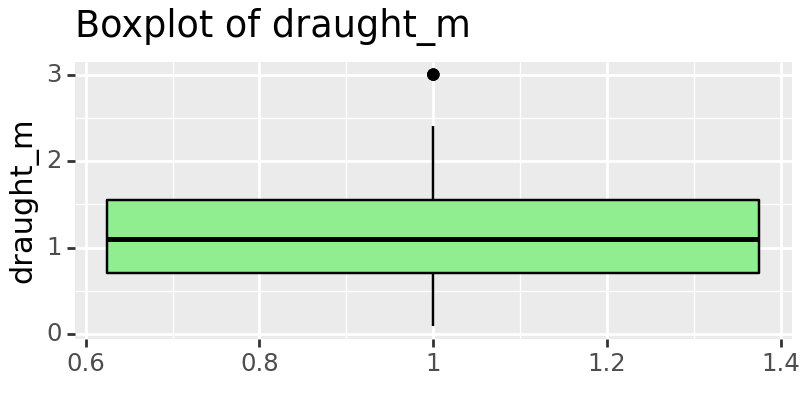

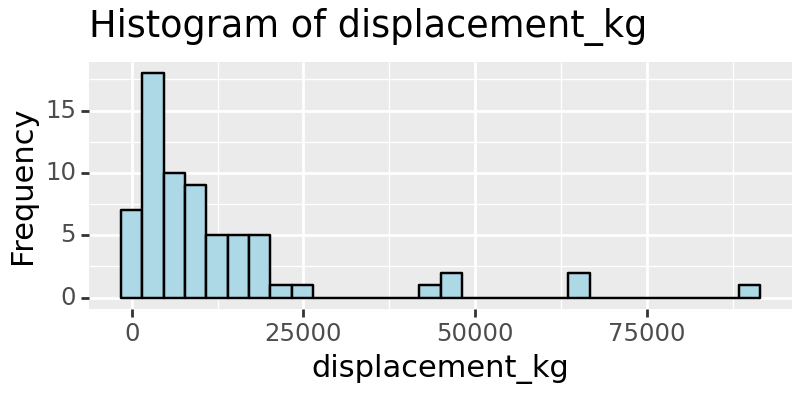

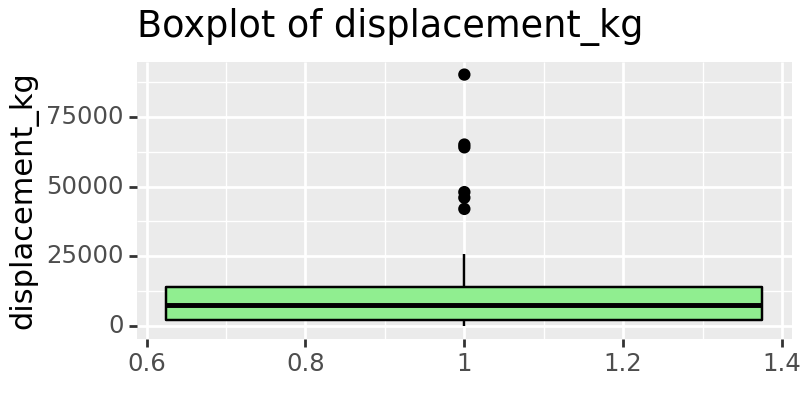

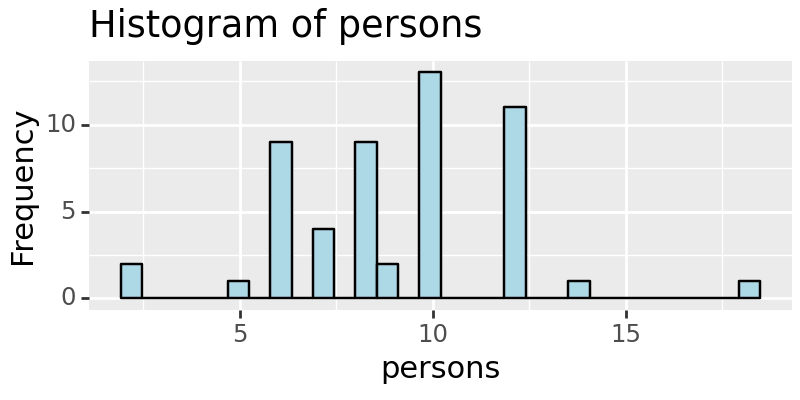

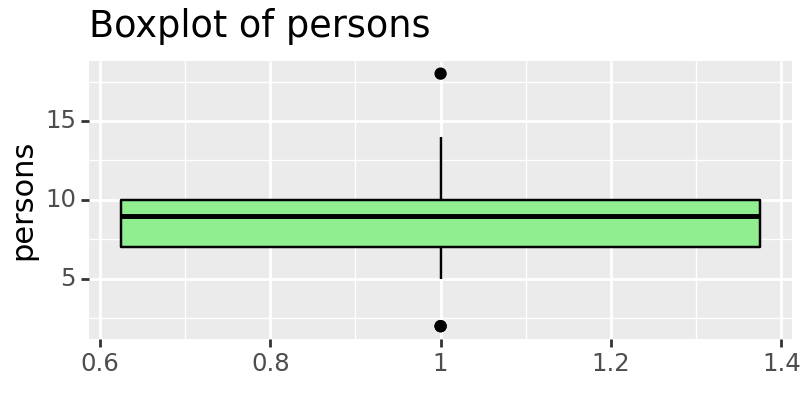

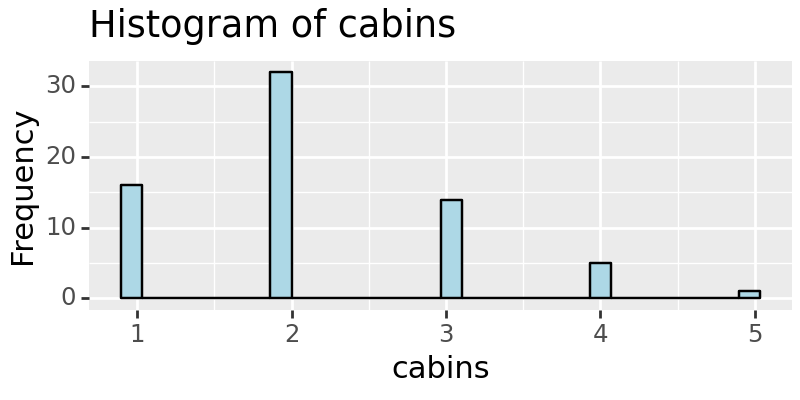

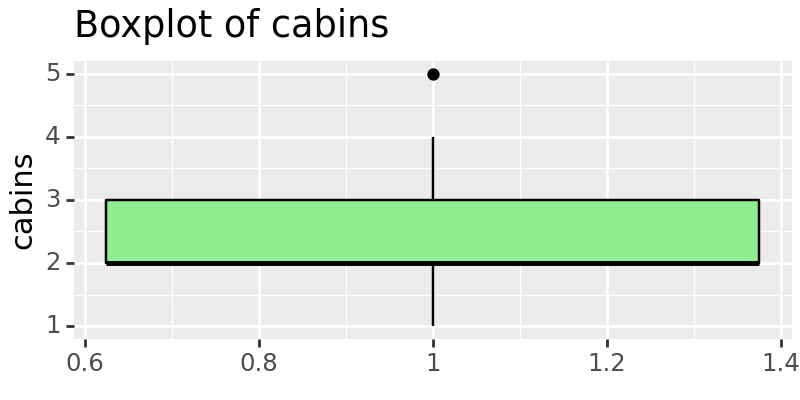

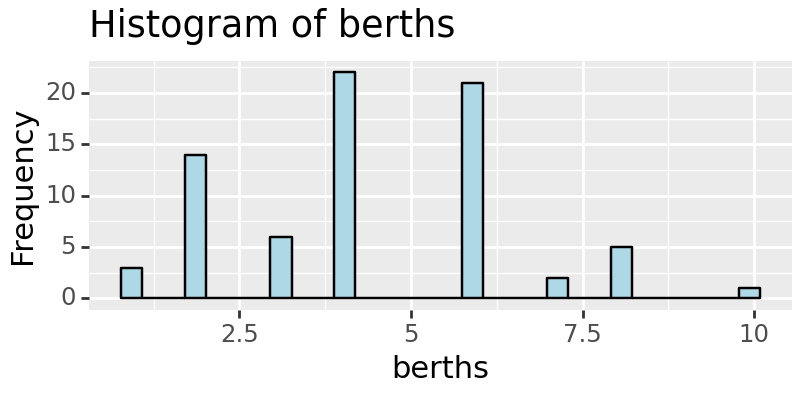

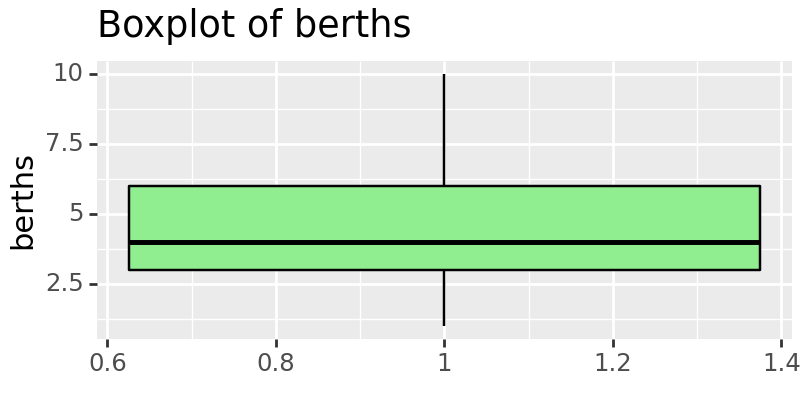

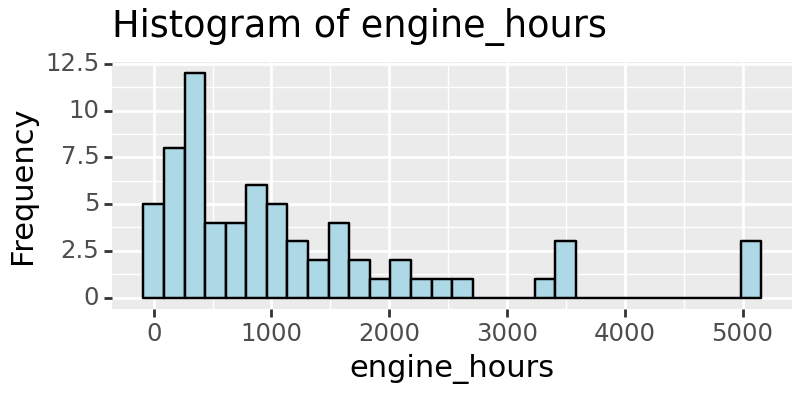

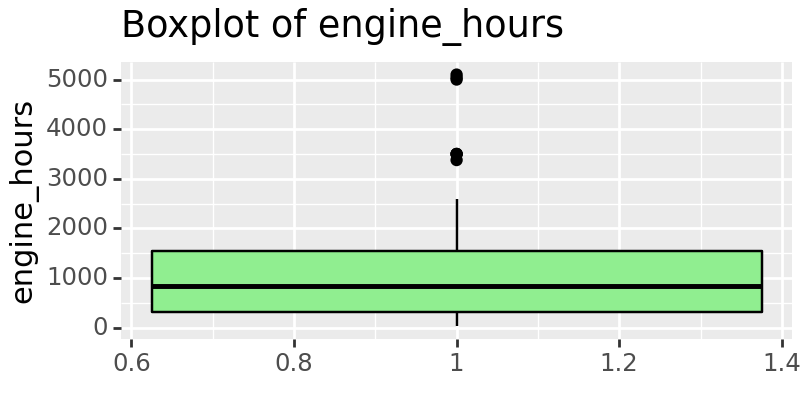

In [5]:
# select the numerical columns
numerical_columns = df.select_dtypes(include=[np.number]).columns

# format the diagrams
plot_width = 4
plot_height = 2
light_blue = '#add8e6'
light_green = '#90ee90'

# create histograms and boxplots
for col in numerical_columns:
    
    hist_plot = (ggplot(df, aes(x=col)) +
                 geom_histogram(bins=30, fill=light_blue, color='black') +
                 labs(title=f'Histogram of {col}', x=col, y='Frequency') +
                 theme(figure_size=(plot_width, plot_height)))
    print(hist_plot)

    box_plot = (ggplot(df, aes(x='1', y=col)) +
            geom_boxplot(fill=light_green, color='black') +
            labs(title=f'Boxplot of {col}', x='', y=col) +  # Módosított y tengely címke
            theme(figure_size=(plot_width, plot_height)))
    print(box_plot)

## Correlation matrix of numerical variables on a heatmap

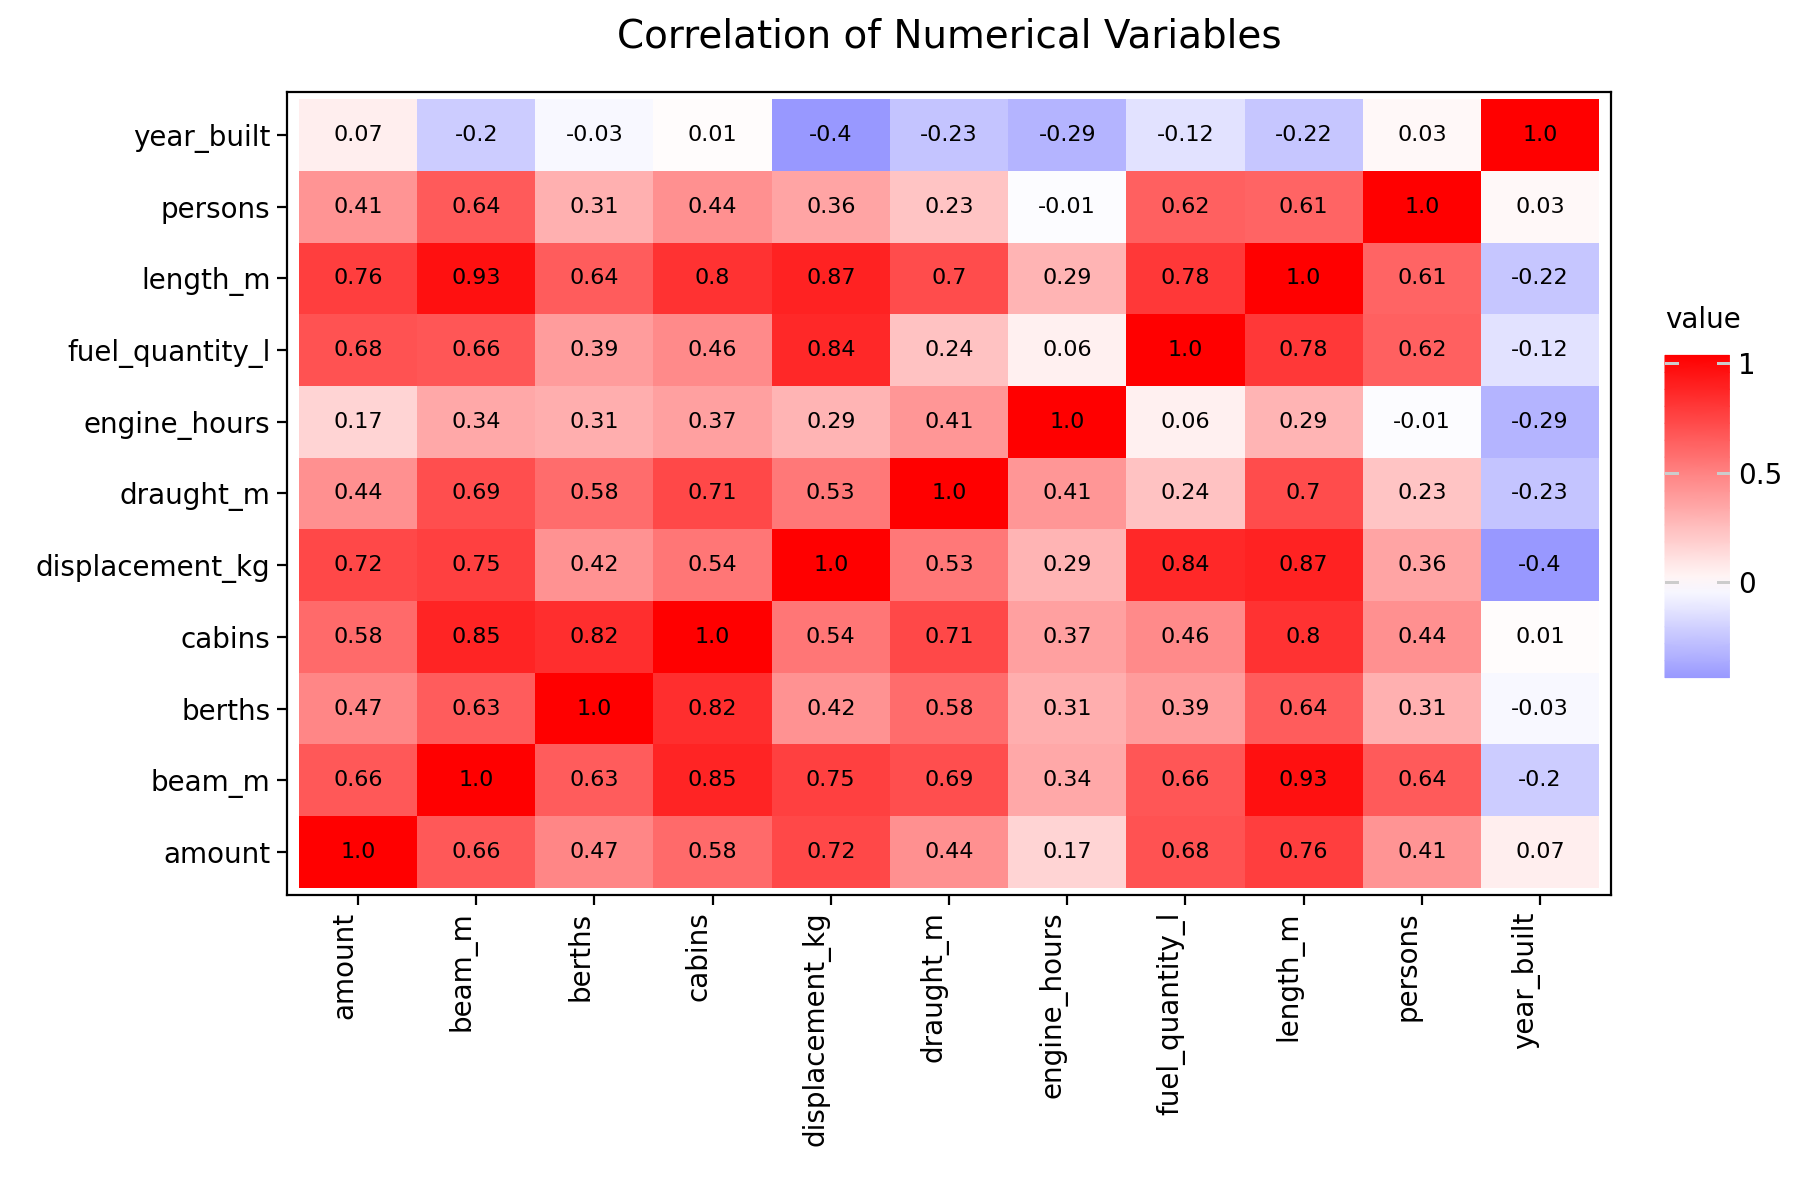

<Figure Size: (900 x 600)>

In [6]:
# create the correlation matrix
corr_matrix = df[numerical_columns].corr()
# 'melt' the correlation matrix so that plotnine can use it
corr_matrix_melted = corr_matrix.reset_index().melt(id_vars='index')

# format the diagrams
plot_width = 9 
plot_height = 6

# create the heatmap of corr.matrix
(ggplot(corr_matrix_melted, aes(x='index', y='variable', fill='value'))
 + geom_tile()
 + geom_text(aes(label=round(corr_matrix_melted['value'], 2)), size=8)
 + scale_fill_gradient2(low="blue", mid="white", high="red", midpoint=0)
 + labs(x='', y='', title='Correlation of Numerical Variables')
 + theme_matplotlib()
 + theme(figure_size=(plot_width, plot_height),
         axis_text_x=element_text(rotation=90, hjust=1),
         plot_title=element_text(size=14, hjust=0.5)))


## Barplots of the distribution of categorical variables


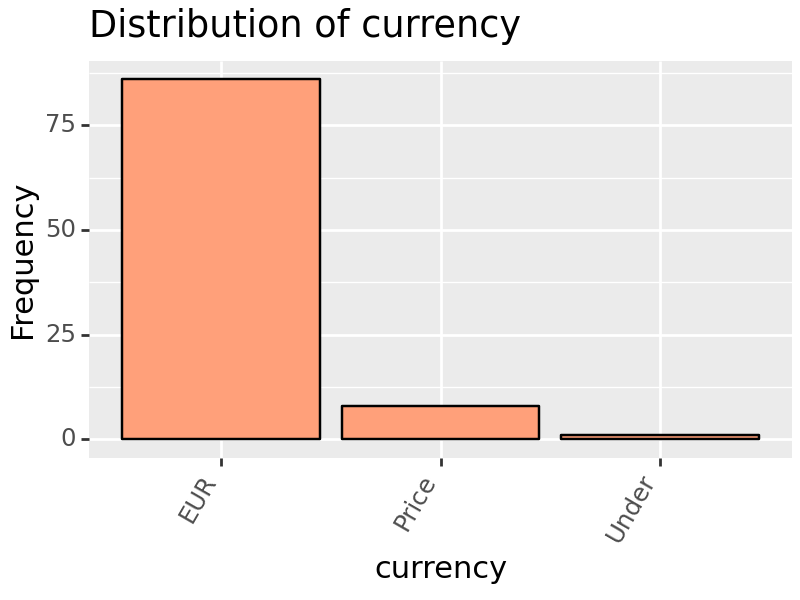

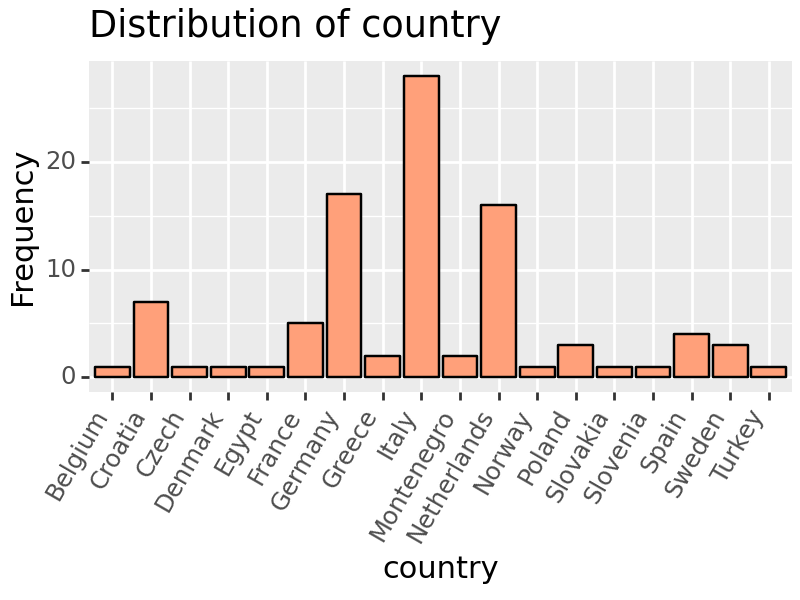

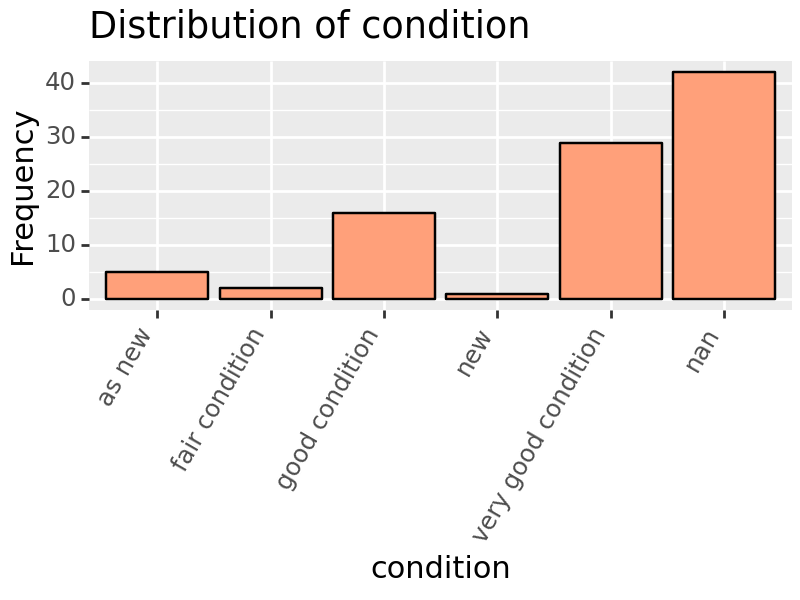

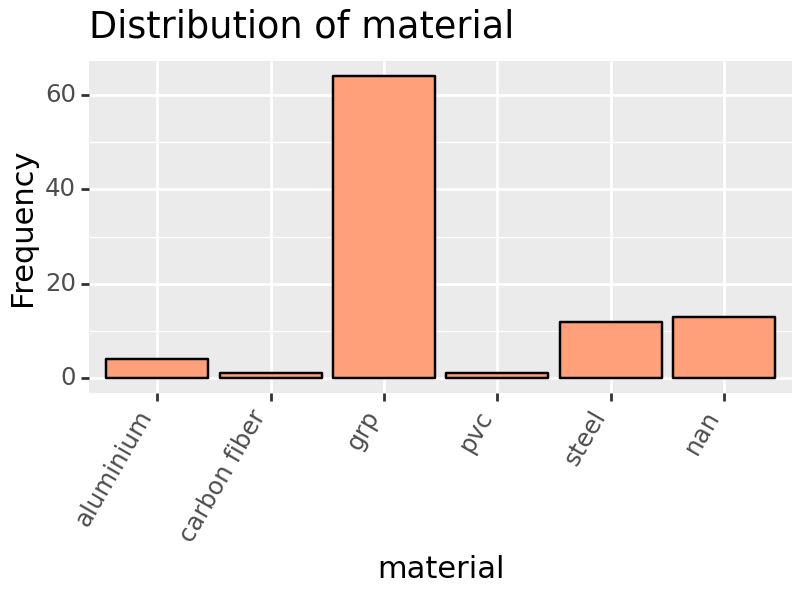

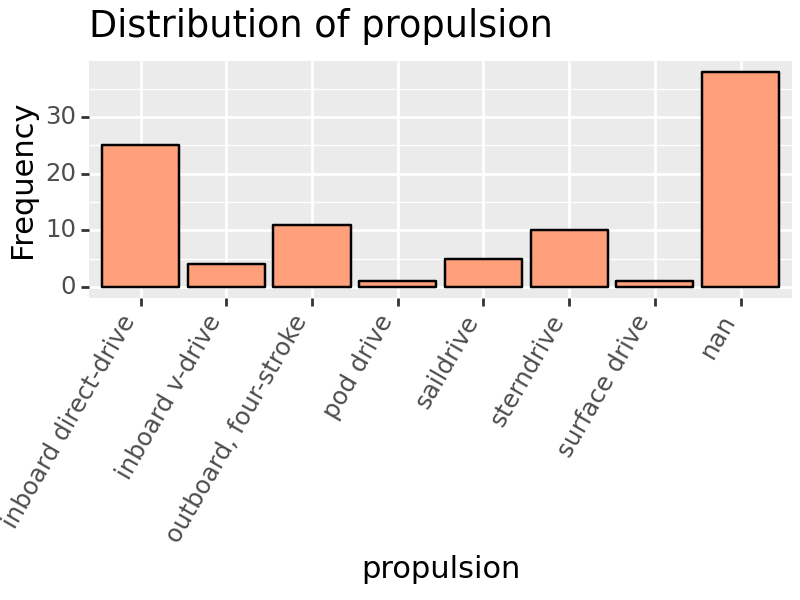

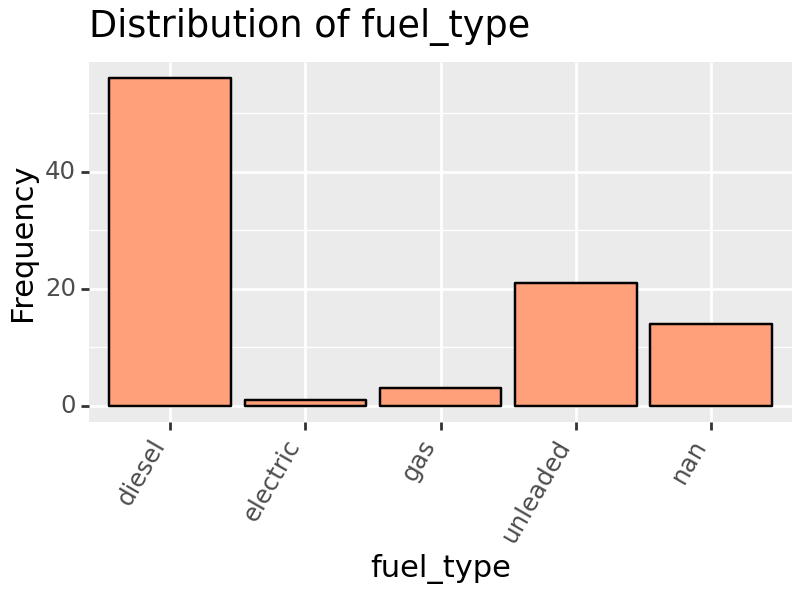

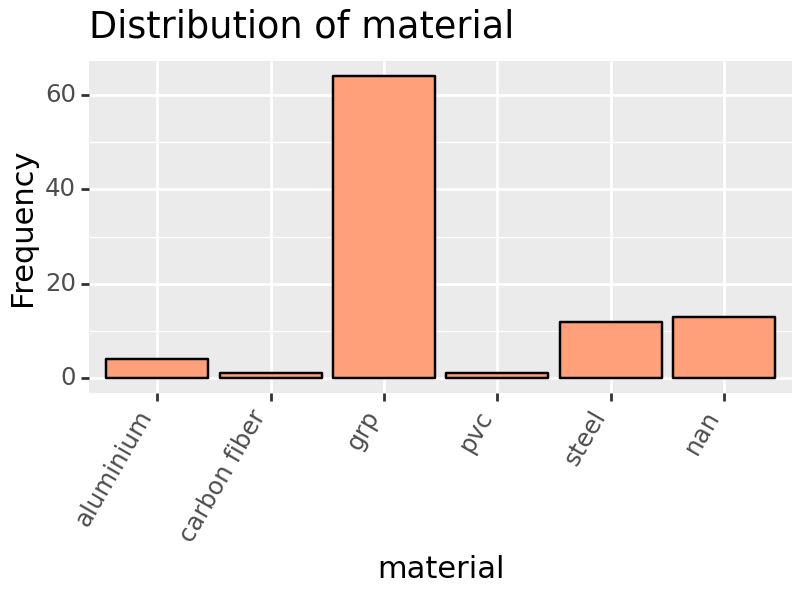

In [7]:
# select categorical columns
categorical_columns = df[['currency', 'country', 'condition', 'material', 
                          'propulsion', 'fuel_type', 'material']].columns

# format the diagrams
plot_width = 4 
plot_height = 3
light_orange = '#FFA07A'

# create barplots 
for col in categorical_columns:
    bar_plot = (ggplot(df, aes(x=col)) +
                geom_bar(fill=light_orange, color='black') +
                labs(title=f'Distribution of {col}', x=col, y='Frequency') +
                theme(figure_size=(plot_width, plot_height),
                      axis_text_x=element_text(rotation=60, hjust=1)))
    print(bar_plot)


## Finally a barplot of the relationship between one numerical and one categorical variable
    - the selected categorical and numerical variable can be exchanged as you like

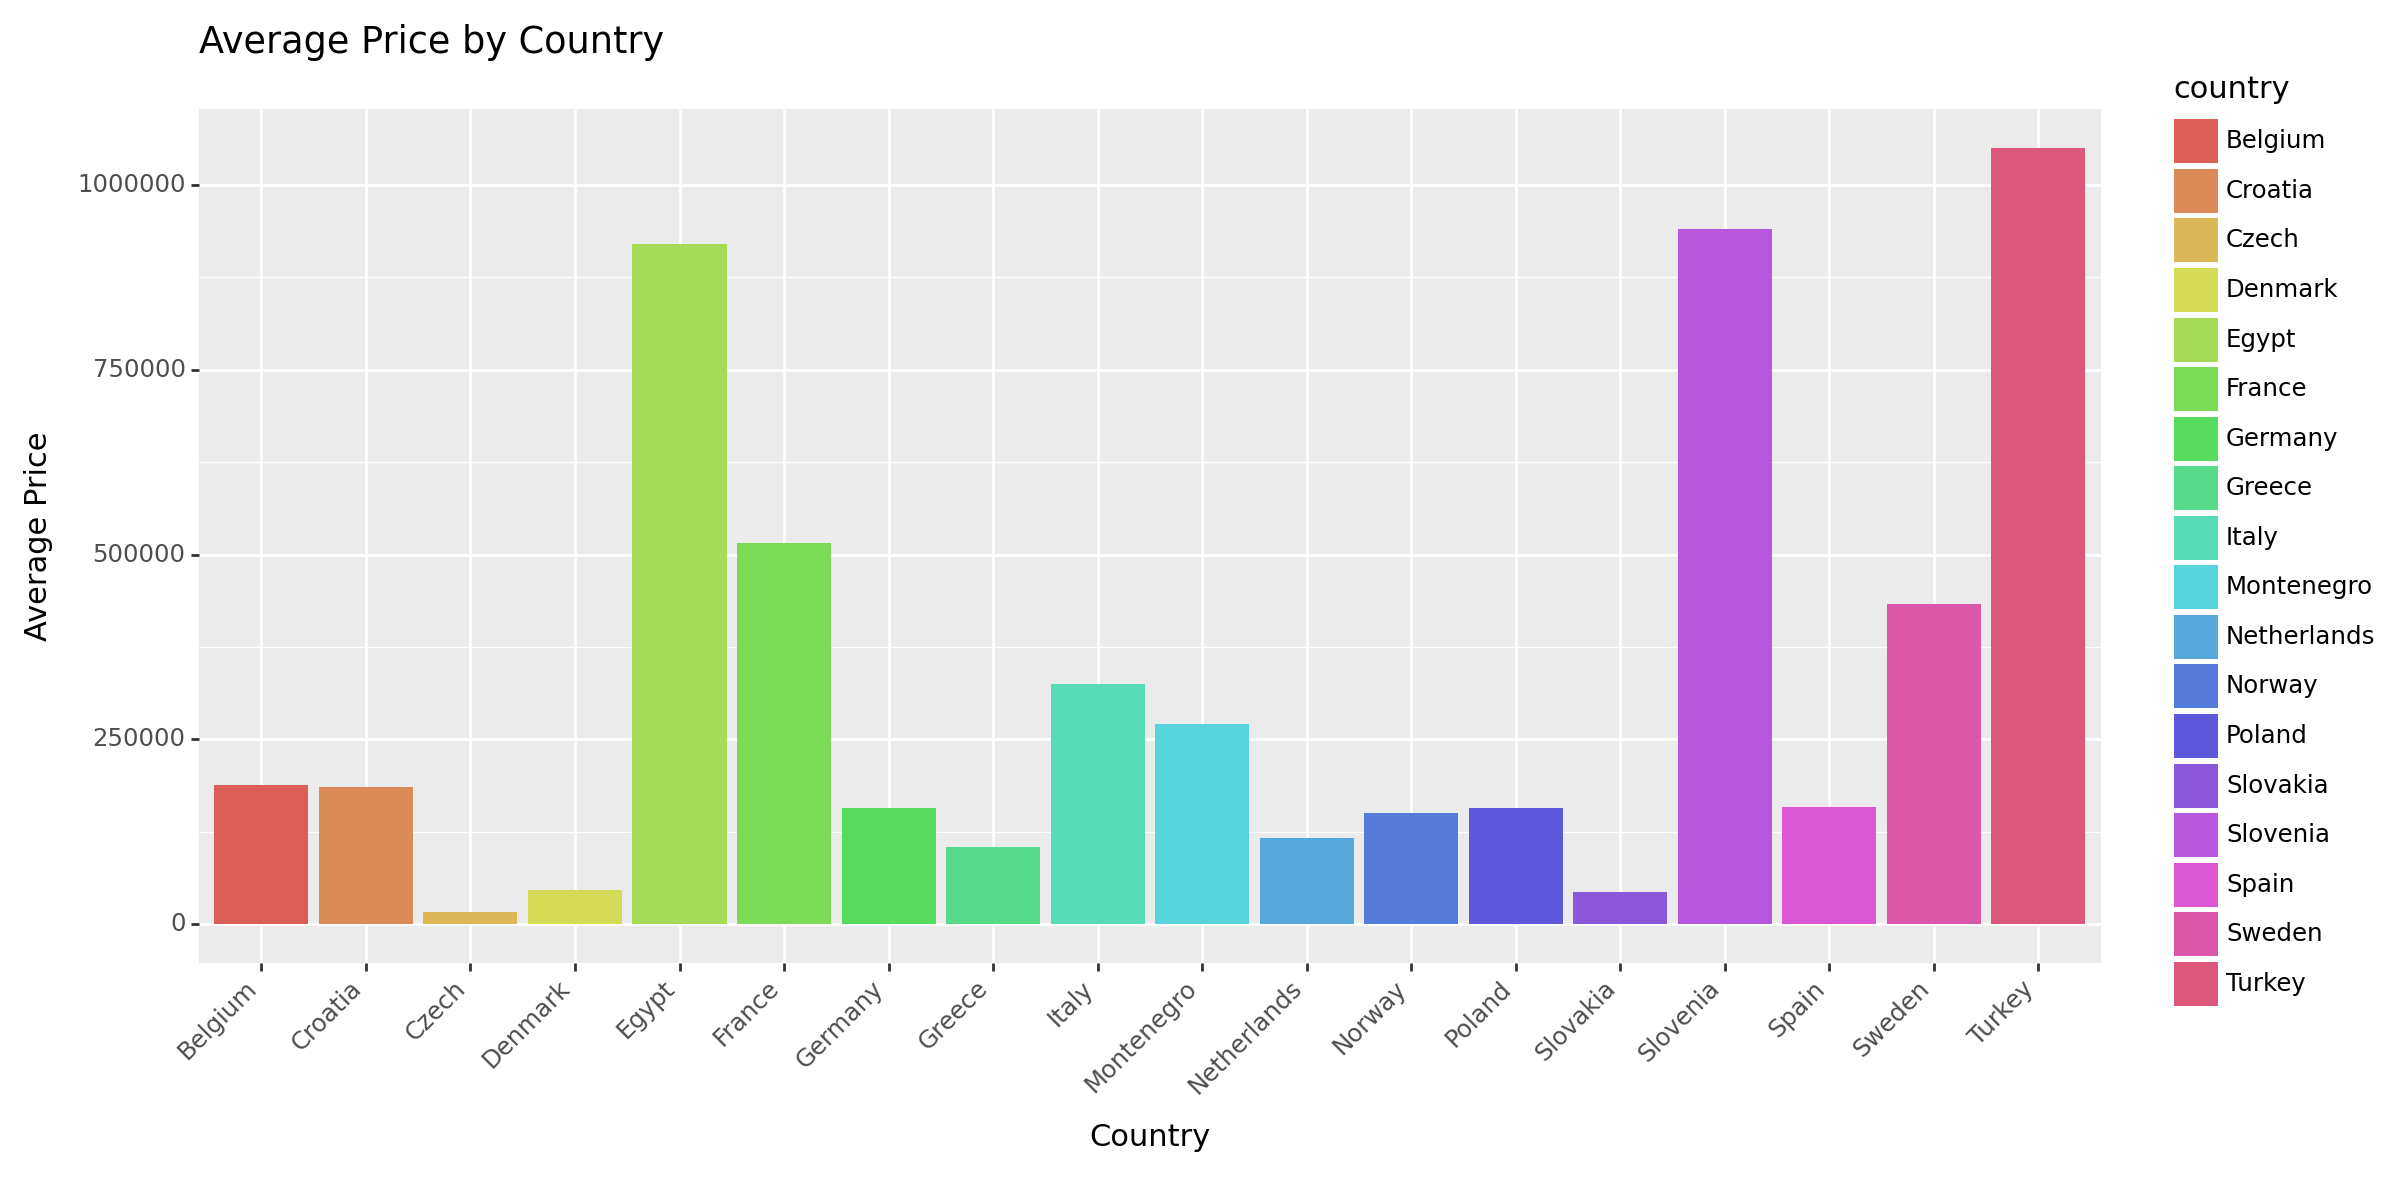

In [8]:
# calculate the average of numerical data by categorical data
average_price_by_country = df.groupby('country')['amount'].mean().reset_index()

# create a barplot about above average
bar_plot = (ggplot(average_price_by_country, aes(x='country', y='amount', fill='country')) +
            geom_col() + 
            labs(title='Average Price by Country', x='Country', y='Average Price') +
            theme(axis_text_x=element_text(rotation=45, hjust=1), figure_size=(12, 6)))

print(bar_plot)
